In [1]:
# Import libraries
import numpy as np
import numpy.random as np_rand
from scipy.stats import beta, norm
import matplotlib.pyplot as plt
import seaborn as sns


In [260]:
# Define parameters
k = 20 # truncation level for truncated drichlet process
alpha = 5 # concentration parameter for DP
n_samples = 100 # Number of X sample points to generate
num_of_gaussian_dim = 2 # Number of dimensions in Gaussian distribution from which X will be sampled
rho = 0.8 # first-order autocorrelation coefficient for covariance matrix of Gaussian distribution from which X will be sampled
variance_prior = 100 # variance of Gaussian baseline distribution in DP
variance_sample = 4 # variance of the gaussion from which X will be sampled


In [261]:
# Generate the baseline 2-dim Gaussion distribution prior of DP
base_mean = np.zeros(num_of_gaussian_dim) # zero-mean Gaussian
base_cov = np.eye(num_of_gaussian_dim) * variance_prior # scaled for comparison across dimensions (values should be of similar order)

#base_cov = [[100, 0], [0, 100]]
print("base_mean: \n", base_mean)
print("base_cov: \n", base_cov)

base_mean: 
 [0. 0.]
base_cov: 
 [[100.   0.]
 [  0. 100.]]


In [262]:
# Generate eta from baseline distribution of DP (Unique values of means(each per dim) from the 2-dim gaussion prior distribution of DP)
eta_params = np_rand.multivariate_normal(base_mean, base_cov, size=k)
#means = norm.rvs(base_mean, base_cov) # draw normal random variables for means
print("eta_params:\n", eta_params)

eta_params:
 [[-19.6600232   -0.03872863]
 [ -1.64210464  -9.6067766 ]
 [-10.13180949  -0.29647944]
 [ 16.89058188 -10.38898356]
 [ -1.73574489 -11.20205715]
 [ -7.91944425  -6.20311133]
 [ -7.54135324  -2.00704401]
 [ 10.8282976   -0.27892468]
 [ 11.41019158   5.39124221]
 [  6.48896811   1.08722808]
 [ -3.38792803 -12.67800058]
 [ -0.5934941    3.8985584 ]
 [ -8.71639783  -2.18132325]
 [  4.03203914  -0.07229973]
 [  3.74649273  -6.39901138]
 [ 10.31392949  -6.61762239]
 [  9.23046248   4.79209365]
 [ -5.59653895  -0.9344578 ]
 [-13.67259311  -9.4221921 ]
 [  1.74820027  -6.59292338]]


In [263]:
# DP using stick-breaking technique
V_params = np_rand.beta(1, alpha, size=k)
V_params[k-2] = 1 #Truncate DP construction at K by setting V_K-1 = 1, but in our case k index start from 0
print("V_params:\n ", V_params)

theta_params = np.zeros(k) # initialize the theta_params
remaining_stick = 1 # initialize the remaining stick length
for i in range(k):
    theta_params[i] = V_params[i] * remaining_stick # break the stick
    remaining_stick *= (1 - V_params[i]) # update the remaining stick length
print("theta_params:\n ", theta_params)

V_params:
  [0.18252955 0.48343714 0.11269049 0.50101931 0.03161148 0.04103228
 0.01949691 0.16173351 0.0972759  0.03717261 0.16569712 0.03333715
 0.02989896 0.07518865 0.0785166  0.21999103 0.11394828 0.30083761
 1.         0.15836772]
theta_params:
  [0.18252955 0.39519558 0.04758636 0.18772618 0.00591016 0.00742898
 0.00338512 0.0275332  0.01388174 0.00478869 0.02055215 0.0034498
 0.00299087 0.00729643 0.00704649 0.01819297 0.00735032 0.0171945
 0.03996092 0.        ]


In [264]:
# Generate the first-order autocorrelation fixed covariance matrix of Gaussian distribution from which X will be sampled
cov = np.zeros((num_of_gaussian_dim, num_of_gaussian_dim)) # initialize the covariance matrix
for i in range(num_of_gaussian_dim):
    for j in range(num_of_gaussian_dim):
            cov[i, j] = variance_sample*(rho ** abs(i - j)) # assign the value based on the distance

#cov = [[3, 0.95], [0.95, 3]]
print('cov matrix: \n', cov)

cov matrix: 
 [[4.  3.2]
 [3.2 4. ]]


Samples: 
 [[ 15.24420728 -11.05768722]
 [ 18.38794078 -10.82332607]
 [ -8.85435617  -7.27831007]
 [ 20.37295448  -6.15796838]
 [ -1.3687821   -8.03203962]
 [ -4.00422468  -9.89629915]
 [ -2.65936147  -8.92815145]
 [ 17.40693293  -8.61573048]
 [ 13.5066693  -11.46590872]
 [-19.48765167   2.08961184]
 [ -0.63823793  -9.28423047]
 [ -1.78068633 -10.06607562]
 [ -1.87594053 -11.28625683]
 [ -4.79911765 -10.81193124]
 [ 17.70868076  -9.09955633]
 [ 16.41217093  -7.66317079]
 [  1.42108765  -9.52593936]
 [  2.68403397  -5.01853972]
 [ -8.77790424  -6.35944538]
 [-15.75012086   1.70589345]
 [ 10.93055409  -1.13647308]
 [ -4.0129043  -11.7834721 ]
 [-19.47225419  -0.40906414]
 [ -4.05620112   1.43204406]
 [ -1.21426412  -9.57142539]
 [ 15.00143075 -11.29433179]
 [ -1.38466931 -10.88013899]
 [ -0.90544979 -10.03291993]
 [ 16.61079573 -11.15010393]
 [ -6.43337893 -13.54406701]
 [ -1.52169469  -8.57463836]
 [  7.14966648   4.20967662]
 [ 16.14323077 -11.27619275]
 [-11.69861751  -1.04717737]
 [ 

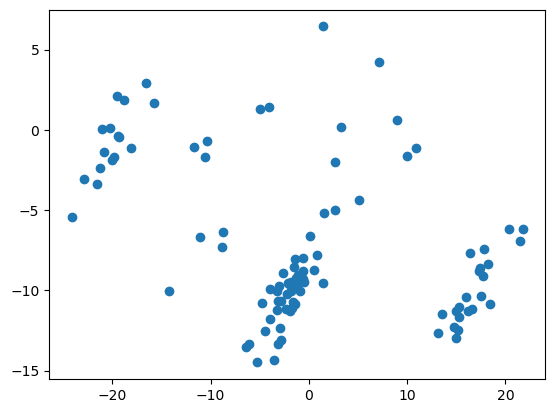

In [265]:
# Generate the samples from the Gaussion-Gaussion distribution
samples = np.zeros((n_samples, num_of_gaussian_dim)) # initialize the data matrix
z_params = np.zeros(n_samples, dtype=int) # initilize the z parameter

for i in range(n_samples):
    z_params[i] = np_rand.choice(k, p=theta_params) # assign a cluster to each sample point
    samples[i] = np_rand.multivariate_normal(eta_params[z_params[i]], cov) # draw a Sample point from the assigned cluster

print("Samples: \n", samples)
plt.scatter(samples[:,0],samples[:,1])